In [43]:

import pandas as PD
import sys
try:
    del sys.modules['CorpusLoadAndFilter']
except KeyError:
    pass
import CorpusLoadAndFilter as CLF



Corpus ready to be analyszed, file loaded correctly


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maxwellchamplin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [24]:
print('hi')

hi


In [25]:
desiredLength = 10
Corpus1 = CLF.load_and_filter_corpus("/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/ApplyingIvyLeague",desired_posts=desiredLength)
Corpus2 = CLF.load_and_filter_corpus("/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/AskACop",desired_posts=desiredLength)

033/033 utterances processed
Corpus loaded and tokenized.
050/185 utterances processed
100/185 utterances processed
150/185 utterances processed
185/185 utterances processed
Corpus loaded and tokenized.


In [26]:
import spacy 
import lftk
corpus_test = CLF.load_and_filter_corpus("/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/ApplyingIvyLeague")

tokenized = CLF.tokenize(corpus_test)


pos_features = lftk.search_features(domain='syntax', family="partofspeech", language="general",
                                    return_format="list_dict")
pos_features = [f['key'] for f in pos_features]
additional_features = ["a_word_ps", "a_bry_ps", "corr_ttr"]
features_to_extract = pos_features + additional_features




corpus = tokenized
utterances = corpus.get_utterances_dataframe()['text'].tolist()
nlp = spacy.load("en_core_web_sm")
# process utterances with spacy pipe
processed_utterances = list(nlp.pipe(utterances))
LFTK = lftk.Extractor(docs=processed_utterances)

features_extracted = LFTK.extract(features=features_to_extract)


dataframe = PD.DataFrame(features_extracted)

dataframe.to_csv('testing.csv')

dataframe.head()

033/033 utterances processed
Corpus loaded and tokenized.


,n_adj,n_adp,n_adv,n_aux,n_cconj,n_det,n_intj,n_noun,n_num,n_part,...,n_upron,n_upropn,n_upunct,n_usconj,n_usym,n_uverb,n_uspace,a_word_ps,a_bry_ps,corr_ttr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3.000,12.000,1.225
1,10,10,5,15,10,15,1,36,0,4,...,12,0,4,3,0,21,2,14.571,57.594,5.545
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
4,2,7,2,3,2,7,0,10,1,4,...,4,3,6,1,0,9,1,16.750,65.830,4.406


In [29]:
function_testing =  CLF.load_and_filter_corpus("/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/ApplyingIvyLeague")
function_token = CLF.tokenize(function_testing)
create_csv = CLF.features_to_csv(function_testing,'functest.csv')

feats = CLF.transform_corpus(function_token,'functest.csv')

#add_feats.get_utterances_dataframe().head(10)


print(feats)

033/033 utterances processed
Corpus loaded and tokenized.
None


/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/CorpusLoadAndFilter.py:94: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']


In [30]:
new = CLF.tokenize(Corpus2)


old = CLF.tokenize(Corpus1)

CLF.features_to_csv(old, 'olddata.csv')


In [31]:
CLF.transform_corpus(new,'data.csv')
CLF.transform_corpus(old,'olddata.csv')


old.get_utterances_dataframe().head()

/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/CorpusLoadAndFilter.py:94: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']
/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/CorpusLoadAndFilter.py:94: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']


,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_upropn,meta.n_upunct,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,meta.corr_ttr,vectors
id,,,,,,,,,,,,,,,,,,,,,
600p6m,1489789158,[deleted],[deleted],None,600p6m,1,None,1492421902,0,None,...,0.0,0.5,0.0,0.0,1.0,0.0,3.0,12.0,1.225,[]
4ytswo,1471766357,"1. Some students have a background, identity, ...",greyhatted,None,4ytswo,1,None,1473066196,0,None,...,0.0,0.133333,0.75,0.0,0.875,0.4,14.571,57.594,5.545,[]
6yduch,1504677768,,bellyjohns,None,6yduch,1,None,1507306065,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
6ypw3p,1504816131,,zjduffy2,None,6ypw3p,1,None,1507312188,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
8rlwya,1529179770,Has anyone ever told you that to stand out in ...,RagsIIRichesMedia,None,8rlwya,2,None,1536386350,0,None,...,1.0,0.6,1.0,0.0,1.0,1.0,16.75,65.83,4.406,[]


In [ ]:
print(type(new))





<class 'convokit.model.corpus.Corpus'>
         Unnamed: 0  n_adj  n_adp  n_adv  n_aux  n_cconj  n_det  n_intj  \
id                                                                        
4dz8vw            0     11     20     10     16        6     14       0   
4ggmg9            1     13      8     10     10        8     13       0   
5yv57g            2     21     49     25     45       17     34       0   
602zvy            3      7      7      4      7        1      4       1   
6078u3            4      0      0      0      0        0      0       0   
...             ...    ...    ...    ...    ...      ...    ...     ...   
dje04k7         180      1      6      2      5        7      6       0   
djg1d0x         181      0      2      0      0        4      2       0   
djg1hbi         182      0      3      1      5        2      2       0   
djh7loi         183      0      0      0      0        0      0       0   
djhgaod         184      0      0      0      1        0     

In [11]:
features = PD.read_csv('data.csv')

features.index = new.get_utterances_dataframe().index


for utt in new.iter_utterances():
    utt_id = utt.id
    features_utterance = features.loc[utt_id]
    
    for feature in features.columns:
        value = features_utterance[feature]
        # normalize if needed
        if feature.startswith("n_") and not feature.startswith("n_u"):
            value = value / utt.meta['num_tokens']
        elif feature.startswith("n_u"):
            corresponding_n_feature = feature.replace("n_u", "n_")
            n_value = features_utterance[corresponding_n_feature]
            if n_value > 0:
                value = value / n_value
            else:
                value = 0.0
        utt.meta[feature] = value

/var/folders/yc/dbfjm6vj48gg1cy6zg1th4780000gn/T/ipykernel_10111/4042111646.py:14: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']


In [12]:
new.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_upron,meta.n_upropn,meta.n_upunct,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,vectors
id,,,,,,,,,,,,,,,,,,,,,
4dz8vw,1460162157,I am asking for a friend because she doesn't h...,dotchianni,None,4dz8vw,1,None,1463531776,0,None,...,0.4,1.0,0.26087,0.857143,0.0,0.68,0.25,16.154,58.39,[]
4ggmg9,1461635068,So I bought a car july of last year. Long stor...,protomor,None,4ggmg9,1,None,1463574188,0,None,...,0.363636,1.0,0.25,1.0,0.0,0.777778,1.0,13.636,50.373,[]
5yv57g,1489269062,I'm in a domestic abuse situation right now wi...,emeraldmaye,None,5yv57g,1,None,1492400284,0,None,...,0.205479,0.4,0.12766,0.5,1.0,0.57971,0.1,23.864,86.067,[]
602zvy,1489821935,Hello everyone! I was wondering if it is illeg...,Thraxzor,None,602zvy,1,None,1492423052,0,None,...,0.555556,1.0,0.714286,1.0,0.0,1.0,0.0,11.5,36.109,[]
6078u3,1489881223,[deleted],[deleted],None,6078u3,1,None,1492425175,0,None,...,0.0,0.0,0.5,0.0,0.0,1.0,0.0,3.0,12.0,[]


In [ ]:
new.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_upron,meta.n_upropn,meta.n_upunct,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,vectors
id,,,,,,,,,,,,,,,,,,,,,
4dz8vw,1460162157,I am asking for a friend because she doesn't h...,dotchianni,None,4dz8vw,1,None,1463531776,0,None,...,0.4,1.0,0.26087,0.857143,0.0,0.68,0.25,16.154,58.39,[]
4ggmg9,1461635068,So I bought a car july of last year. Long stor...,protomor,None,4ggmg9,1,None,1463574188,0,None,...,0.363636,1.0,0.25,1.0,0.0,0.777778,1.0,13.636,50.373,[]
5yv57g,1489269062,I'm in a domestic abuse situation right now wi...,emeraldmaye,None,5yv57g,1,None,1492400284,0,None,...,0.205479,0.4,0.12766,0.5,1.0,0.57971,0.1,23.864,86.067,[]
602zvy,1489821935,Hello everyone! I was wondering if it is illeg...,Thraxzor,None,602zvy,1,None,1492423052,0,None,...,0.555556,1.0,0.714286,1.0,0.0,1.0,0.0,11.5,36.109,[]
6078u3,1489881223,[deleted],[deleted],None,6078u3,1,None,1492425175,0,None,...,0.0,0.0,0.5,0.0,0.0,1.0,0.0,3.0,12.0,[]


In [34]:
features.head(10)

,Unnamed: 0,n_adj,n_adp,n_adv,n_aux,n_cconj,n_det,n_intj,n_noun,n_num,...,n_upron,n_upropn,n_upunct,n_usconj,n_usym,n_uverb,n_uspace,a_word_ps,a_bry_ps,corr_ttr
id,,,,,,,,,,,,,,,,,,,,,
4dz8vw,0,11,20,10,16,6,14,0,34,1,...,12,4,6,6,0,17,1,16.154,58.390,5.416
4ggmg9,1,13,8,10,10,8,13,0,24,1,...,8,3,3,3,0,14,1,13.636,50.373,5.081
5yv57g,2,21,49,25,45,17,34,0,70,9,...,15,4,6,10,1,40,1,23.864,86.067,6.110
602zvy,3,7,7,4,7,1,4,1,8,0,...,5,4,5,2,0,6,0,11.500,36.109,4.341
6078u3,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3.000,12.000,1.225
4woaax,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3.000,12.000,1.225
4zei90,6,4,10,3,8,0,7,0,17,0,...,5,0,2,3,0,12,0,25.667,114.722,4.674
48vb57,7,15,39,21,30,15,22,1,49,1,...,16,5,5,8,0,40,1,20.350,70.170,5.853
4bzhdb,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000


In [33]:
print(features.columns)

Index(['Unnamed: 0', 'n_adj', 'n_adp', 'n_adv', 'n_aux', 'n_cconj', 'n_det',
       'n_intj', 'n_noun', 'n_num', 'n_part', 'n_pron', 'n_propn', 'n_punct',
       'n_sconj', 'n_sym', 'n_verb', 'n_space', 'n_uadj', 'n_uadp', 'n_uadv',
       'n_uaux', 'n_ucconj', 'n_udet', 'n_uintj', 'n_unoun', 'n_unum',
       'n_upart', 'n_upron', 'n_upropn', 'n_upunct', 'n_usconj', 'n_usym',
       'n_uverb', 'n_uspace', 'a_word_ps', 'a_bry_ps', 'corr_ttr'],
      dtype='object')


In [148]:
new.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_upron,meta.n_upropn,meta.n_upunct,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,vectors
id,,,,,,,,,,,,,,,,,,,,,
4dz8vw,1460162157,I am asking for a friend because she doesn't h...,dotchianni,None,4dz8vw,1,None,1463531776,0,None,...,0.4,1.0,0.26087,0.857143,0.0,0.68,0.25,16.154,58.39,[]
4ggmg9,1461635068,So I bought a car july of last year. Long stor...,protomor,None,4ggmg9,1,None,1463574188,0,None,...,0.363636,1.0,0.25,1.0,0.0,0.777778,1.0,13.636,50.373,[]
5yv57g,1489269062,I'm in a domestic abuse situation right now wi...,emeraldmaye,None,5yv57g,1,None,1492400284,0,None,...,0.205479,0.4,0.12766,0.5,1.0,0.57971,0.1,23.864,86.067,[]
602zvy,1489821935,Hello everyone! I was wondering if it is illeg...,Thraxzor,None,602zvy,1,None,1492423052,0,None,...,0.555556,1.0,0.714286,1.0,0.0,1.0,0.0,11.5,36.109,[]
6078u3,1489881223,[deleted],[deleted],None,6078u3,1,None,1492425175,0,None,...,0.0,0.0,0.5,0.0,0.0,1.0,0.0,3.0,12.0,[]


In [43]:
old.get_utterances_dataframe()


,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,meta.num_tokens,vectors
id,,,,,,,,,,,,,,,,
600p6m,1489789158,[deleted],[deleted],None,600p6m,1,None,1492421902,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/600p6m/is_cornel...,,1,[]
4ytswo,1471766357,"1. Some students have a background, identity, ...",greyhatted,None,4ytswo,1,None,1473066196,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/4ytswo/common_ap...,,168,[]
6yduch,1504677768,,bellyjohns,None,6yduch,1,None,1507306065,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/6yduch/where_is_...,,0,[]
6ypw3p,1504816131,,zjduffy2,None,6ypw3p,1,None,1507312188,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/6ypw3p/website_i...,,0,[]
8rlwya,1529179770,Has anyone ever told you that to stand out in ...,RagsIIRichesMedia,None,8rlwya,2,None,1536386350,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/8rlwya/how_to_st...,,55,[]
8tcvdc,1529787250,Are you curious about what classes are like at...,RagsIIRichesMedia,None,8tcvdc,1,None,1536436118,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/8tcvdc/harvard_c...,,63,[]
8v2que,1530374207,We all know the college admissions process is ...,RagsIIRichesMedia,None,8v2que,1,None,1536465162,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/8v2que/stressed_...,,39,[]
94uifa,1533497766,"Harvard has been in the news a lot lately, pri...",RagsIIRichesMedia,None,94uifa,2,None,1536713667,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/94uifa/harvards_...,,38,[]
96t9as,1534115448,Leaving home for your first semester of colleg...,RagsIIRichesMedia,None,96t9as,1,None,1536747091,0,None,ApplyingIvyLeague,False,/r/ApplyingIvyLeague/comments/96t9as/tips_for_...,,37,[]


{'whiskers': [<matplotlib.lines.Line2D at 0x13e056010>,
 'caps': [<matplotlib.lines.Line2D at 0x13e10ad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e056410>],
 'medians': [<matplotlib.lines.Line2D at 0x13e108150>],
 'fliers': [<matplotlib.lines.Line2D at 0x13e10a350>],
 'means': []}

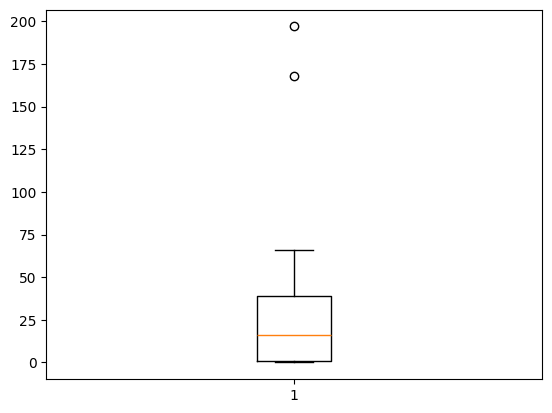

In [42]:
import matplotlib

x = list(new.get_utterances_dataframe()['meta.num_tokens'])
y = list(old.get_utterances_dataframe()['meta.num_tokens'])

matplotlib.pyplot.boxplot(y)



In [39]:
old.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_upropn,meta.n_upunct,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,meta.corr_ttr,vectors
id,,,,,,,,,,,,,,,,,,,,,
600p6m,1489789158,[deleted],[deleted],None,600p6m,1,None,1492421902,0,None,...,0.0,0.5,0.0,0.0,1.0,0.0,3.0,12.0,1.225,[]
4ytswo,1471766357,"1. Some students have a background, identity, ...",greyhatted,None,4ytswo,1,None,1473066196,0,None,...,0.0,0.133333,0.75,0.0,0.875,0.4,14.571,57.594,5.545,[]
6yduch,1504677768,,bellyjohns,None,6yduch,1,None,1507306065,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
6ypw3p,1504816131,,zjduffy2,None,6ypw3p,1,None,1507312188,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
8rlwya,1529179770,Has anyone ever told you that to stand out in ...,RagsIIRichesMedia,None,8rlwya,2,None,1536386350,0,None,...,1.0,0.6,1.0,0.0,1.0,1.0,16.75,65.83,4.406,[]


In [42]:
CLF.analyze_differences(old,new)


KeyError: 'n_adj'